In [1]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 20.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 7.3 MB/s eta 0:00:00


In [3]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 43.3

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [5]:
# Load the dataset
url = 'https://drive.google.com/file/d/1aVaBRN5SmTldPNNaI99tEaap2mhWkXYa/view?usp=sharing'
file_id = url.split('/')[-2]
download_url = 'https://drive.google.com/uc?id=' + file_id
data = pd.read_csv(download_url)
data.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44'],
      dtype='object')

In [6]:
# Explore the dataset
print(data.head())
print(data.info())
print(data.describe())

   Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)   \
0     1.0               1.0         0.0        28.0         44.6        152.0   
1     2.0               2.0         0.0        36.0         65.0        161.5   
2     3.0               3.0         1.0        33.0         68.8        165.0   
3     4.0               4.0         0.0        37.0         65.0        148.0   
4     5.0               5.0         0.0        25.0         52.0        161.0   

      BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  ...  \
0    19.3         15.0              78.0              22.0  ...   
1  #NAME?         15.0              74.0              20.0  ...   
2  #NAME?         11.0              72.0              18.0  ...   
3  #NAME?         13.0              72.0              20.0  ...   
4  #NAME?         11.0              72.0              18.0  ...   

   Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
0              1.0                0.0           

In [7]:
# Remove columns with all missing values
data = data.dropna(axis=1, how='all')

# Remove rows with all missing values
data = data.dropna(axis=0, how='all')

# Remove the last column, which is unnamed
data = data.iloc[:, :-1]

# Remove all irrelevant columns: 'Sl. No', 'Patient File No.'
data2 = data.drop(['Sl. No', 'Patient File No.', 'BMI'], axis=1)
data2.head()


,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0.0,28.0,44.6,152.0,15.0,78.0,22.0,10.48,2.0,5.0,...,0.0,1.0,0.0,110.0,80.0,3.0,3.0,18.0,18.0,8.5
1,0.0,36.0,65.0,161.5,15.0,74.0,20.0,11.70,2.0,5.0,...,0.0,0.0,0.0,120.0,70.0,3.0,5.0,15.0,14.0,3.7
2,1.0,33.0,68.8,165.0,11.0,72.0,18.0,11.80,2.0,5.0,...,1.0,1.0,0.0,120.0,80.0,13.0,15.0,18.0,20.0,10.0
3,0.0,37.0,65.0,148.0,13.0,72.0,20.0,12.00,2.0,5.0,...,0.0,0.0,0.0,120.0,70.0,2.0,2.0,15.0,14.0,7.5
4,0.0,25.0,52.0,161.0,11.0,72.0,18.0,10.00,2.0,5.0,...,0.0,0.0,0.0,120.0,80.0,3.0,4.0,16.0,14.0,7.0


In [8]:
data2.shape

(541, 41)

                    Column  Missing Values  Missing Percentage  Total Data
0                   Sl. No               0            0.000000         541
1         Patient File No.               0            0.000000         541
2               PCOS (Y/N)               0            0.000000         541
3                Age (yrs)               0            0.000000         541
4              Weight (Kg)               0            0.000000         541
5              Height(Cm)                0            0.000000         541
6                      BMI               0            0.000000         541
7              Blood Group               0            0.000000         541
8         Pulse rate(bpm)                0            0.000000         541
9         RR (breaths/min)               0            0.000000         541
10                Hb(g/dl)               0            0.000000         541
11              Cycle(R/I)               0            0.000000         541
12      Cycle length(days

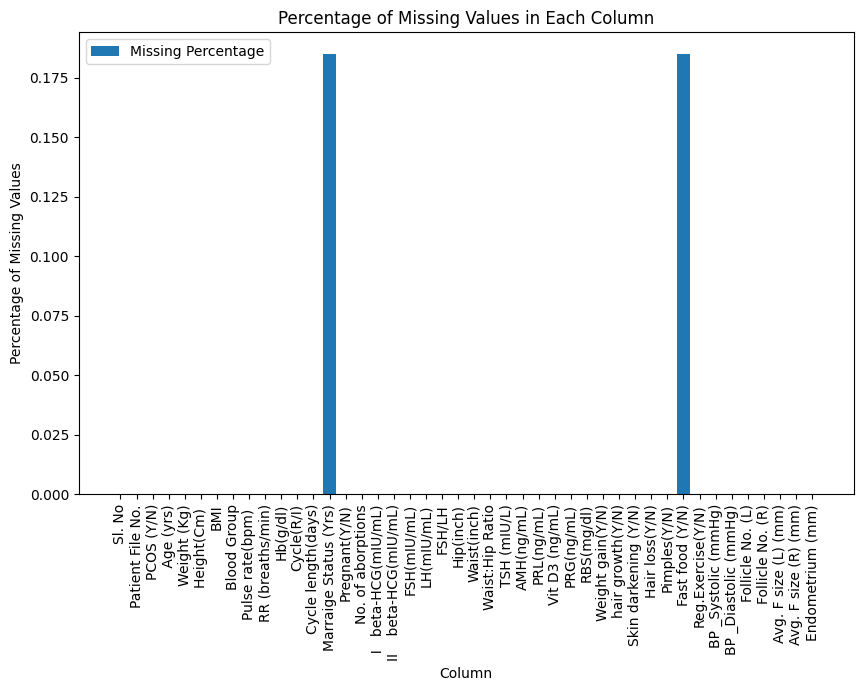

In [9]:
# Calculate missing values and total data
missing_values = data.isnull().sum()
total_data = data.shape[0]
missing_percentage = (missing_values / total_data) * 100

# Prepare a DataFrame for missing data analysis
missing_data = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Values': missing_values.values,
    'Missing Percentage': missing_percentage.values,
    'Total Data': total_data
})

print(missing_data)

# For visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(missing_data['Column'], missing_data['Missing Percentage'], label='Missing Percentage')
plt.xlabel('Column')
plt.ylabel('Percentage of Missing Values')
plt.title('Percentage of Missing Values in Each Column')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [10]:
# Check for missing values
print(data2.isnull().sum())

PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     1
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           1
Reg.Exercise(Y/N)         0
BP _Systolic (mmHg)       0
BP _Diastolic (mmHg)

#FINDING THE BEST MODEL TO PREDICT THE PCOS - USING PYCARET

In [11]:
#splitting the dataframe into two parts

from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data2, test_size=0.30, random_state=42)

In [12]:
from pycaret.regression import *

clf = setup(data=train_data, target='PCOS (Y/N)', session_id=123,
            normalize=True, transformation=True,
            remove_multicollinearity=True, multicollinearity_threshold=0.95)

,Description,Value
0,Session id,123
1,Target,PCOS (Y/N)
2,Target type,Regression
3,Original data shape,"(378, 41)"
4,Transformed data shape,"(378, 44)"
5,Transformed train set shape,"(264, 44)"
6,Transformed test set shape,"(114, 44)"
7,Numeric features,36
8,Categorical features,4
9,Rows with missing values,0.5%


In [13]:
best_model = compare_models(include = ['rf', 'lightgbm', 'xgboost', 'dt']) # excluding models that do not support feature importance plots

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.3247,0.2079,0.4542,0.0311,0.3032,0.5744,1.0350
rf,Random Forest Regressor,0.3389,0.2448,0.4914,-0.1384,0.3323,0.6459,1.1980
xgboost,Extreme Gradient Boosting,0.3541,0.2775,0.5237,-0.2832,0.3576,0.6607,0.3300
dt,Decision Tree Regressor,0.3630,0.3630,0.6001,-0.6935,0.4160,0.8332,0.3100


Processing:   0%|          | 0/21 [00:00<?, ?it/s]

#MODEL NO 1- LIGHTGBM

In [14]:
print(best_model)

LGBMRegressor(n_jobs=-1, random_state=123)


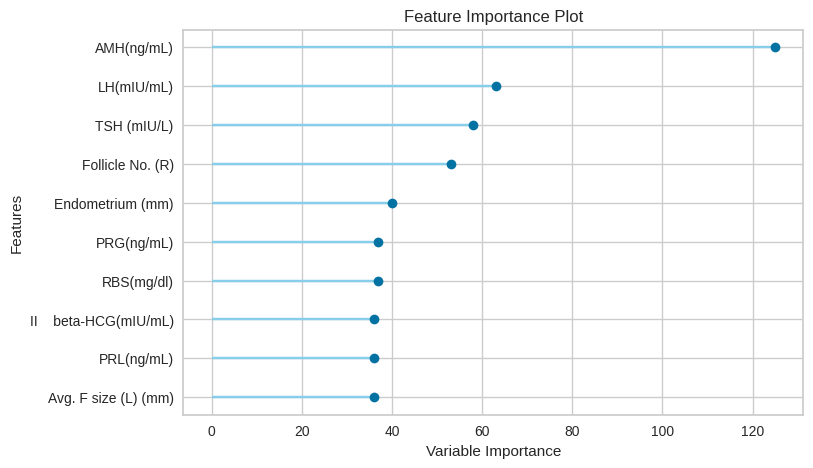

In [15]:
plot_model(best_model, plot='feature') #Finding the relevant features

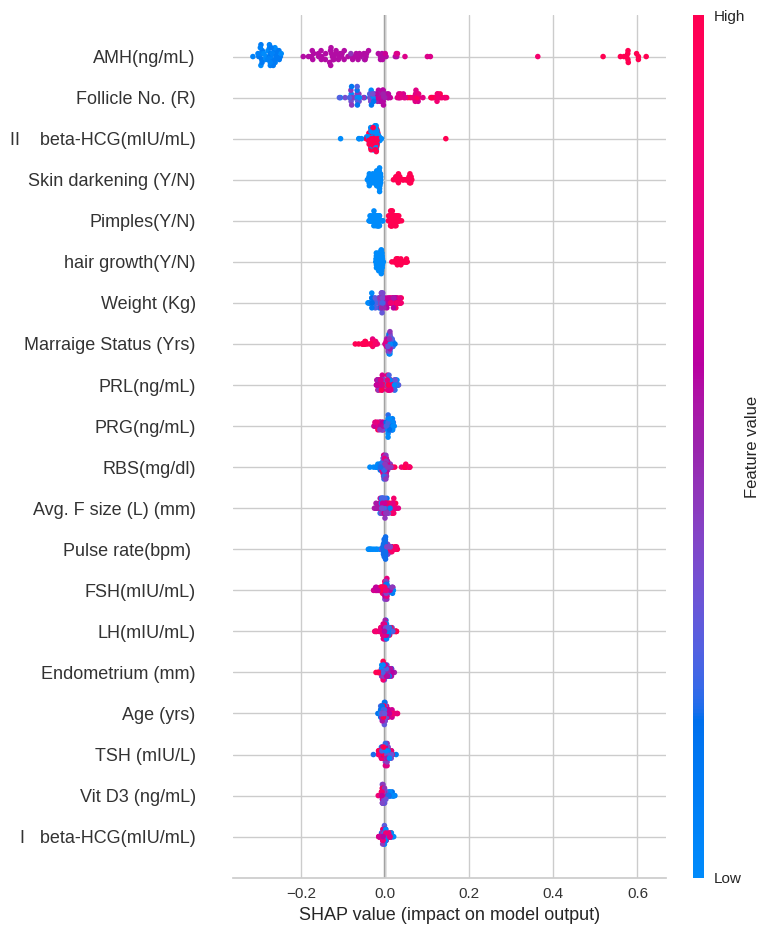

In [16]:
interpret_model(best_model) #SHAP Value summary plot

**SHAP (SHapley Additive exPlanations)**
1. Features on the Y-axis: Features are listed in order of importance from top to bottom.
2. SHAP Values on the X-axis: These values indicate how much each feature changes the prediction from a baseline value. The position (left or right) and color  indicate the direction and magnitude of the feature's impact.
3. Insight: Features towards the top have a greater overall impact on model outcomes. Positive SHAP values typically indicate an increase in the prediction value due to that feature, whereas negative values indicate a decrease. By analyzing the spread and location of the dots (representing individual data points), we can gauge the consistency and variability of a feature’s influence.

In [17]:
final_results = predict_model(best_model, data=test_data)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.3148,0.1971,0.4440,0.1017,0.3019,0.5679


In [18]:
print(final_results)
print(final_results.columns)

      Age (yrs)  Weight (Kg)  Height(Cm)   Blood Group  Pulse rate(bpm)   \
229        28.0    74.300003        154.0         13.0              72.0   
73         26.0    70.000000        163.0         15.0              72.0   
352        27.0    60.000000        164.0         15.0              72.0   
86         31.0    64.000000        156.0         15.0              74.0   
470        34.0    52.000000        149.0         13.0              80.0   
..          ...          ...          ...          ...               ...   
275        27.0    47.000000        152.0         15.0              74.0   
362        42.0    50.000000        161.0         15.0              74.0   
31         34.0    57.000000        150.0         11.0              72.0   
113        32.0    63.000000        164.0         17.0              72.0   
381        35.0    60.000000        146.0         15.0              82.0   

     RR (breaths/min)  Hb(g/dl)  Cycle(R/I)  Cycle length(days)  \
229              18.

In [19]:
print(test_data['PCOS (Y/N)'].dtype, final_results['prediction_label'].dtype)


float64 float64


In [20]:
# Convert float64 to int for both columns
test_labels = test_data['PCOS (Y/N)'].astype(int)
predicted_labels = final_results['prediction_label'].astype(int)

# classification report
from sklearn.metrics import classification_report
print(classification_report(test_labels, predicted_labels))


              precision    recall  f1-score   support

           0       0.69      0.99      0.81       110
           1       0.80      0.08      0.14        53

    accuracy                           0.69       163
   macro avg       0.74      0.53      0.48       163
weighted avg       0.73      0.69      0.59       163



1. **Precision**: Indicates the accuracy of positive predictions. Formally, precision is the ratio of true positives to the sum of true and false positives.
For class 0: Precision is 0.68, meaning when it predicts the class as 0, it is correct 68% of the time.
For class 1: Precision is 1.00, indicating perfect precision (every prediction of class 1 was correct), but this should be viewed cautiously as we'll see next.
2. **Recall** (Sensitivity or True Positive Rate): Measures the ability of the model to find all the relevant cases (all actual positives).
For class 0: Recall is 1.00, meaning the model successfully identifies all actual class 0 instances.
For class 1: Recall is extremely low at 0.04, indicating the model successfully identifies only 4% of all actual class 1 instances.
3. **F1-Score**: The harmonic mean of precision and recall. It is a better measure than accuracy for imbalanced classes.
For class 0: High F1-score of 0.81 reflects both high precision and recall.
For class 1: Very low F1-score of 0.07, indicating poor performance in both precision and recall for this class.
4.  **Accuracy**: Overall, how often is the classifier correct? Here, it is 0.69 or 69%.
This metric can be misleading if there is class imbalance, as high accuracy might be achieved by simply predicting the majority class most of the time.
5. **Macro Avg**: Average precision, recall, and F1-score between classes without weighting for class imbalance.
Macro avg for F1-score is 0.44, suggesting poor overall performance across both classes when not considering class distribution.
6. **Weighted Avg**: Precision, recall, and F1-score averaged, weighted by the number of true instances for each class.
Weighted avg for F1-score is 0.57, which is better than the macro average, reflecting the higher number of class 0 instances.

AUC-ROC Score: 0.5331903945111492


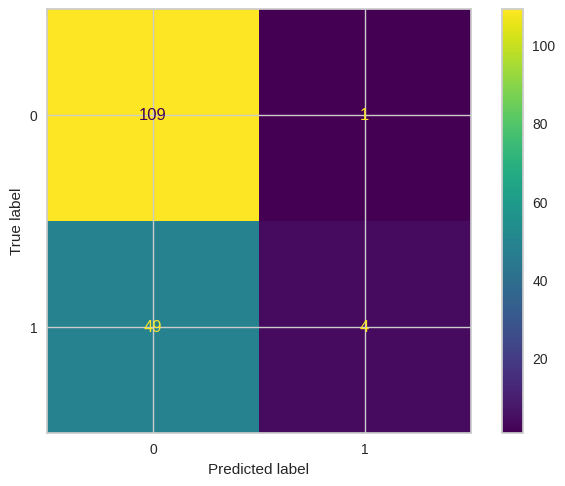

In [21]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay


fpr, tpr, thresholds = roc_curve(test_labels, predicted_labels, pos_label=1)
auc = roc_auc_score(test_labels, predicted_labels)
ConfusionMatrixDisplay(confusion_matrix(test_labels, predicted_labels)).plot()

print(f"AUC-ROC Score: {auc}")

The **AUC-ROC** score measures the ability of your model to discriminate between the classes (e.g., having PCOS vs. not having PCOS). The score ranges from 0 to 1, where a score of 0.5 suggests no discriminative ability (similar to random guessing), and a score of 1 indicates perfect discrimination.

An AUC-ROC score of approximately 0.519 is only slightly better than random guessing. This suggests that the model has very limited ability to differentiate between the positive (PCOS) and negative (non-PCOS) classes.

**Confusion Matrix**
1. Top-Left: True Negatives (TN) – Correct non-PCOS predictions.
2. Top-Right: False Positives (FP) – Non-PCOS cases incorrectly classified as PCOS.
3. Bottom-Left: False Negatives (FN) – PCOS cases incorrectly classified as non-PCOS.
4. Bottom-Right: True Positives (TP) – Correct PCOS predictions.

In [22]:
TN = 109
FP = 1
FN = 49
TP = 4

recall_value = TP/(TP+FP)
precision_value = TP/(TP+FN)

print(f"recall value = {recall_value}")
print(f"precision_value = {precision_value}")

recall value = 0.8
precision_value = 0.07547169811320754


The recall of 0.0755 indicates that the model identifies only about 7.55% of all actual PCOS cases correctly. This is very low and suggests that the model fails to detect the majority of true PCOS cases, which is problematic for a diagnostic tool aimed at early detection of PCOS. The clinical implication of such a low recall rate is significant, potentially resulting in many undiagnosed individuals.

The precision of 0.8 is quite high, indicating that 80% of the positive PCOS predictions made by the model are correct. While this suggests that when the model predicts PCOS, it is usually right, the low recall rate substantially undermines the utility of the model because it misses so many actual cases.

##Formulate Hypothesis

Hypothesis 1: Women with PCOS have a higher rate of infertility than those without PCOS.


Contingency Table:
Pregnant(Y/N)  0.0  1.0
PCOS (Y/N)             
0.0            222  142
1.0            113   64


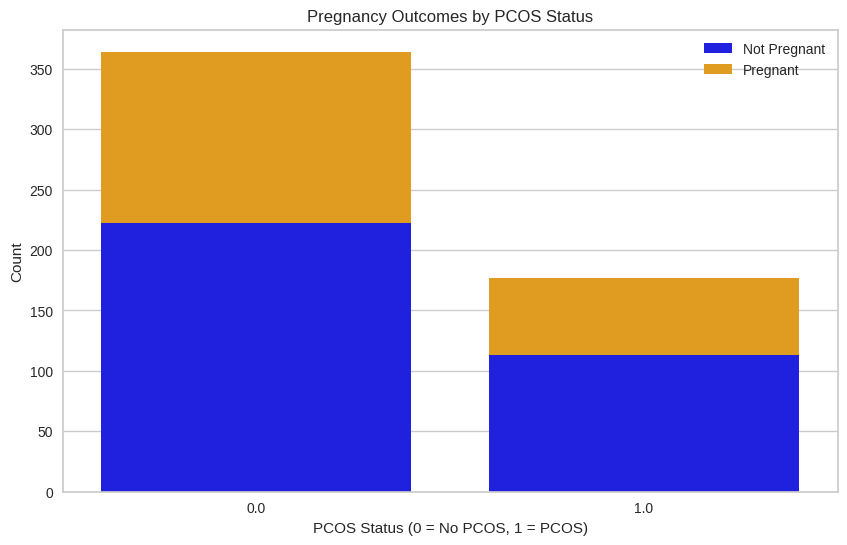


Chi-Square Test Results:
Chi-Square Statistic: 0.2989686750004424
P-Value: 0.5845296923733834


In [23]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data2['PCOS (Y/N)'], data2['Pregnant(Y/N)'])

# Output the contingency table for verification
print("Contingency Table:")
print(contingency_table)

# Visualize the contingency table
plt.figure(figsize=(10, 6))
sns.barplot(x=contingency_table.index, y=contingency_table[0], color='blue', label='Not Pregnant')
sns.barplot(x=contingency_table.index, y=contingency_table[1], bottom=contingency_table[0], color='orange', label='Pregnant')
plt.title('Pregnancy Outcomes by PCOS Status')
plt.xlabel('PCOS Status (0 = No PCOS, 1 = PCOS)')
plt.ylabel('Count')
plt.legend()
plt.show()

# Perform Chi-Square Test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p_value}")

In [29]:
print(data2.dtypes)

PCOS (Y/N)                float64
 Age (yrs)                float64
Weight (Kg)               float64
Height(Cm)                float64
Blood Group               float64
Pulse rate(bpm)           float64
RR (breaths/min)          float64
Hb(g/dl)                  float64
Cycle(R/I)                float64
Cycle length(days)        float64
Marraige Status (Yrs)     float64
Pregnant(Y/N)             float64
No. of aborptions         float64
  I   beta-HCG(mIU/mL)    float64
II    beta-HCG(mIU/mL)     object
FSH(mIU/mL)               float64
LH(mIU/mL)                float64
FSH/LH                     object
Hip(inch)                 float64
Waist(inch)               float64
Waist:Hip Ratio            object
TSH (mIU/L)               float64
AMH(ng/mL)                 object
PRL(ng/mL)                float64
Vit D3 (ng/mL)            float64
PRG(ng/mL)                float64
RBS(mg/dl)                float64
Weight gain(Y/N)          float64
hair growth(Y/N)          float64
Skin darkening

In [30]:
data2['AMH(ng/mL)'] = pd.to_numeric(data2['AMH(ng/mL)'], errors='coerce')

T-test for AMH(ng/mL): Stat=6.345137213745459, P-value=4.720235485036421e-10


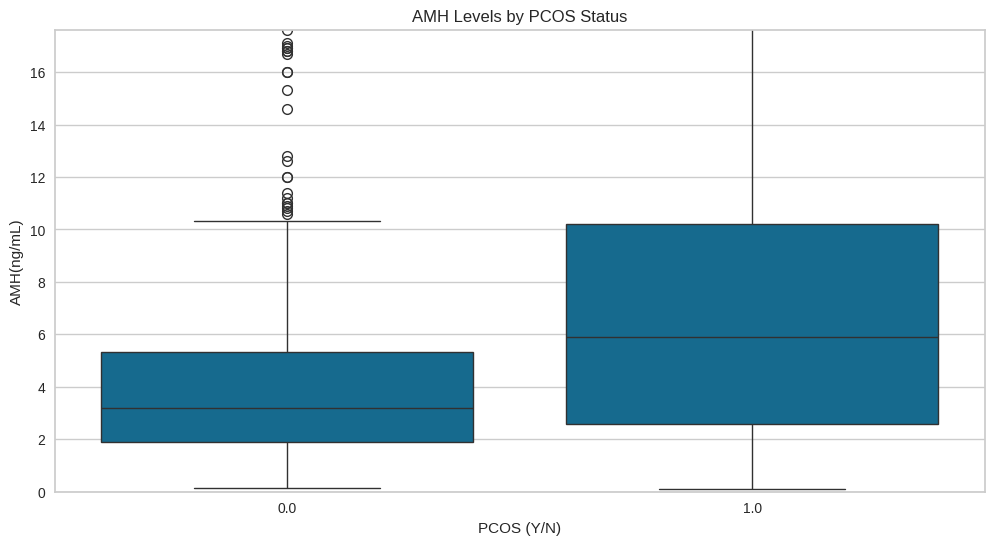

In [31]:
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

# Separate the groups
group_pcos = data2[data2['PCOS (Y/N)'] == 1]
group_no_pcos = data2[data2['PCOS (Y/N)'] == 0]

# List of features to test
features = ['AMH(ng/mL)']

# Perform t-tests
for feature in features:
    # Assuming non-nan values
    t_stat, p_val = ttest_ind(group_pcos[feature].dropna(), group_no_pcos[feature].dropna())
    print(f"T-test for {feature}: Stat={t_stat}, P-value={p_val}")

# Visualization of AMH Levels
plt.figure(figsize=(12, 6))
sns.boxplot(x='PCOS (Y/N)', y='AMH(ng/mL)', data=data2)
plt.title('AMH Levels by PCOS Status')
plt.ylim(0, data2['AMH(ng/mL)'].quantile(0.95))
plt.show()


Hypothesis 2: Specific features such as BMI, cycle irregularities, and hormone levels (FSH, LH) are significantly different in women with PCOS compared to those without.

T-test for FSH(mIU/mL): Stat=-0.7042264896797843, P-value=0.4815958757295662
T-test for LH(mIU/mL): Stat=1.4860723524459616, P-value=0.13784464591838938
T-test for Cycle(R/I): Stat=10.182083692554235, P-value=2.1754276134108946e-22


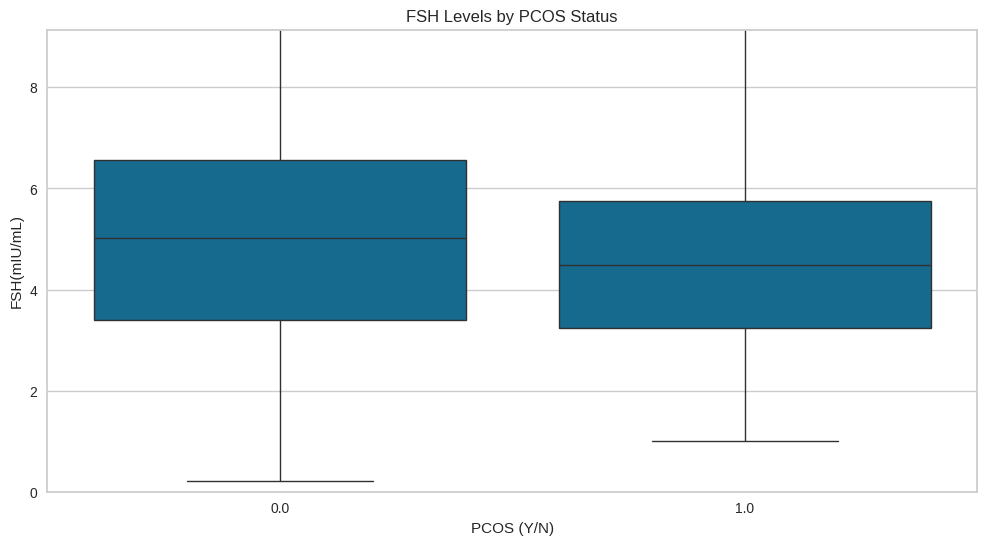

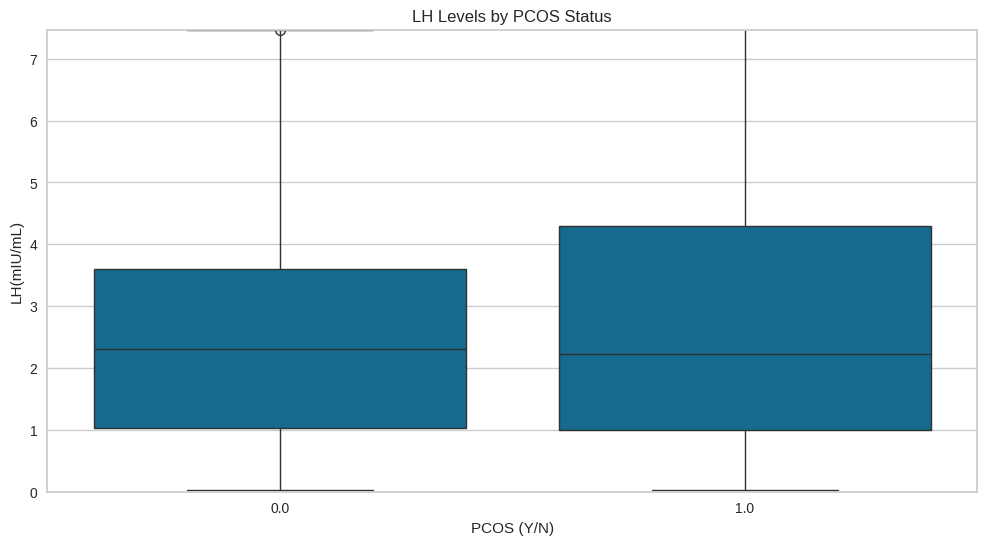

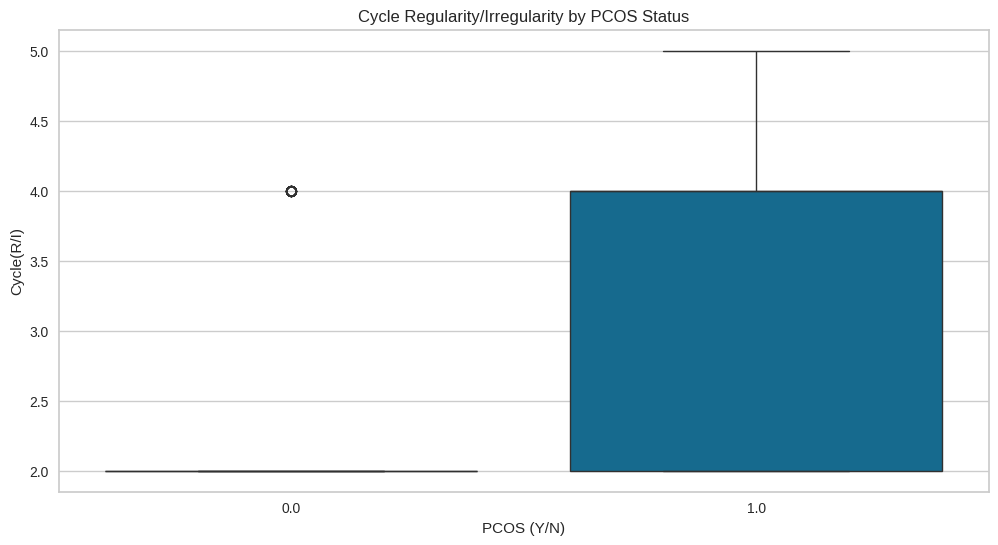

In [24]:
from scipy.stats import ttest_ind

# Separate the groups
group_pcos = data2[data2['PCOS (Y/N)'] == 1]
group_no_pcos = data2[data2['PCOS (Y/N)'] == 0]

# List of features to test
features = ['FSH(mIU/mL)', 'LH(mIU/mL)', 'Cycle(R/I)']

# Perform t-tests
for feature in features:
    # Assuming non-nan values
    t_stat, p_val = ttest_ind(group_pcos[feature].dropna(), group_no_pcos[feature].dropna())
    print(f"T-test for {feature}: Stat={t_stat}, P-value={p_val}")

# Visualization of Hormone Levels
plt.figure(figsize=(12, 6))
sns.boxplot(x='PCOS (Y/N)', y='FSH(mIU/mL)', data=data2)
plt.title('FSH Levels by PCOS Status')
plt.ylim(0, data2['FSH(mIU/mL)'].quantile(0.95))
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='PCOS (Y/N)', y='LH(mIU/mL)', data=data2)
plt.title('LH Levels by PCOS Status')
plt.ylim(0, data2['LH(mIU/mL)'].quantile(0.95))
plt.show()

# Assuming 'Cycle(R/I)' can be visualized directly
plt.figure(figsize=(12, 6))
sns.boxplot(x='PCOS (Y/N)', y='Cycle(R/I)', data=data2)
plt.title('Cycle Regularity/Irregularity by PCOS Status')
plt.show()

#--------------End of Model LightGBM-------------------------

TypeError: 'LGBMRegressor' object is not subscriptable

In [27]:

plot_model('rf'', plot='feature') #Finding the relevant features

SyntaxError: unterminated string literal (detected at line 1) (<ipython-input-27-99387f2e0a7d>, line 1)

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44'],
      dtype='object')
Hypothesis Test 1: This provides the age difference between PCOS and non PCOS groups
Stati

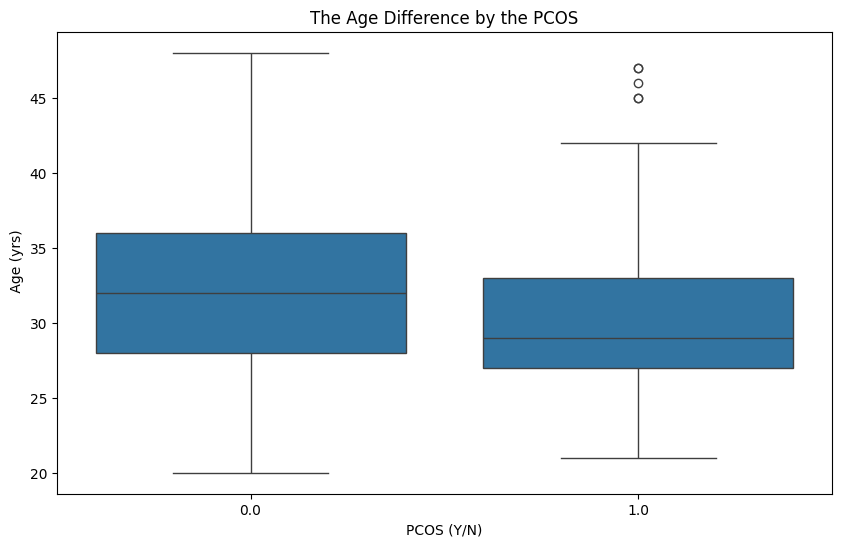

In [ ]:
# First Hypothesis Test For Age Difference:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://drive.google.com/file/d/1aVaBRN5SmTldPNNaI99tEaap2mhWkXYa/view?usp=sharing'
file_id = url.split('/')[-2]
download_url = 'https://drive.google.com/uc?id=' + file_id
data = pd.read_csv(download_url)




# First Hypothesis Test For Age Difference:
print(data.columns)
pcos_age = data[data['PCOS (Y/N)'] == 1][' Age (yrs)']
non_pcos_age = data[data['PCOS (Y/N)'] == 0][' Age (yrs)']

t_statistic, p_value = stats.ttest_ind(pcos_age, non_pcos_age)
print("Hypothesis Test 1: This provides the age difference between PCOS and non PCOS groups")
print("Statistic for Test 1:", t_statistic)
print("Value for Test 1:", p_value)

# Sceond Hypotheses Test For Body Mass Index:
data['BMI'] = pd.to_numeric(data['BMI'], errors='coerce')
pcos_bmi = data[data['PCOS (Y/N)'] == 1]['BMI']
non_pcos_bmi = data[data['PCOS (Y/N)'] == 0]['BMI']

pcos_bmi = pcos_bmi.dropna()
non_pcos_bmi = non_pcos_bmi.dropna()

t_statistic, p_value = stats.ttest_ind(pcos_bmi, non_pcos_bmi)
print("Hypothesis Test 2: This provides the BMI differences between PCOS and no PCOS groups")
print("Statistics for Test 2:", t_statistic)
print("Value for Test 2:", p_value)

# Third Hypotheses Test for Hormone Levels:
pcos_hormone_levels = data[data['PCOS (Y/N)'] == 1]['PRL(ng/mL)']
non_pcos_hormone_levels = data[data['PCOS (Y/N)'] == 0]['PRL(ng/mL)']

t_statistic, p_value = stats.ttest_ind(pcos_hormone_levels, non_pcos_hormone_levels)
print("Hypothesis Test 3: This provides the Hormone Levels for PCOS and Non PCOS groups")
print("Statistics for Test 3:", t_statistic)
print("Value for Test 3:", p_value)

#Visualizations to support findings
plt.figure(figsize=(10, 6))
sns.boxplot(x='PCOS (Y/N)', y=' Age (yrs)', data=data)
#sns.boxplot(x='PCOS (Y/N)', y='BMI', data=data.dropna(subset=['BMI])) This is to display BMI graph
#sns.boxplot(x='PCOS (Y/N)', y='PRL(ng/nL)', data=data.dropna(subset=['PRL(ng/mL)'])) This is to display hormone graph
plt.title('The Age Difference by the PCOS')
plt.show()
